This notebook was created to analyze the data after generating additional rows of data in an attempt to create a more balanced dataset.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset into a DataFrame
def load_dataset(file_path):
    return pd.read_json(file_path)

In [3]:
# Perform basic EDA
def perform_eda(df):
    # 1. Dataset overview
    overview = {
        "Total Commands": len(df),
        "Unique Intents": df['intent'].nunique(),
        "Intent Distribution": df['intent'].value_counts().to_dict(),
    }
    
    # 2. Flatten the rooms and actions for further analysis
    rooms_flat = [room for rooms in df['rooms'] for room in rooms]
    actions_flat = [action['action'] for actions in df['actions'] for action in actions]

    # Create Series for room and action frequencies
    rooms_series = pd.Series(rooms_flat)
    actions_series = pd.Series(actions_flat)

    # Top rooms and actions
    top_rooms = rooms_series.value_counts()
    top_actions = actions_series.value_counts()

    # Visualization: Intent Distribution
    plt.figure(figsize=(8, 5))
    df['intent'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribution of Intents', fontsize=14)
    plt.xlabel('Intent', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Visualization: Top 10 Rooms
    plt.figure(figsize=(10, 6))
    top_rooms.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title('Distribution of all Rooms', fontsize=14)
    plt.xlabel('Room', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Visualization: Top 10 Actions
    plt.figure(figsize=(10, 6))
    top_actions.plot(kind='bar', color='salmon', edgecolor='black')
    plt.title('Distribution of Actions', fontsize=14)
    plt.xlabel('Action', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return overview

In [5]:
# File path (Update this with the local path to your dataset)
root = "../../data"
file_name = "restructured_dataset_additional.json"
file_path = os.path.join(root, file_name)

# Load and analyze the dataset
df = load_dataset(file_path)
df.head()

,command,intent,rooms,actions
0,Bathroom ma batti on gareko cha ra chat ma pani.,multi_room_control,"[bathroom, terrace]","[{'room': 'bathroom', 'action': 'turn_on'}, {'..."
1,Khaana kotha ra bato ma lights off garnu please.,multi_room_control,"[dining area, corridor]","[{'room': 'dining area', 'action': 'turn_off'}..."
2,Can you turn off the lights in the puja kotha ...,multi_room_control,"[prayer room, store room]","[{'room': 'prayer room', 'action': 'turn_off'}..."
3,Mandir ra bathroom ko lights dim garna sakinu ...,multi_room_control,"[prayer room, bathroom]","[{'room': 'prayer room', 'action': 'adjust_bri..."
4,Store room ra kausi ko batti balai dinus.,multi_room_control,"[store room, terrace]","[{'room': 'store room', 'action': 'turn_on'}, ..."


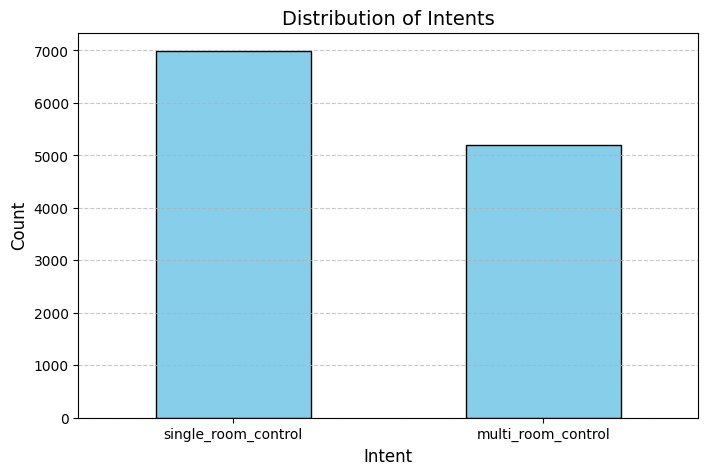

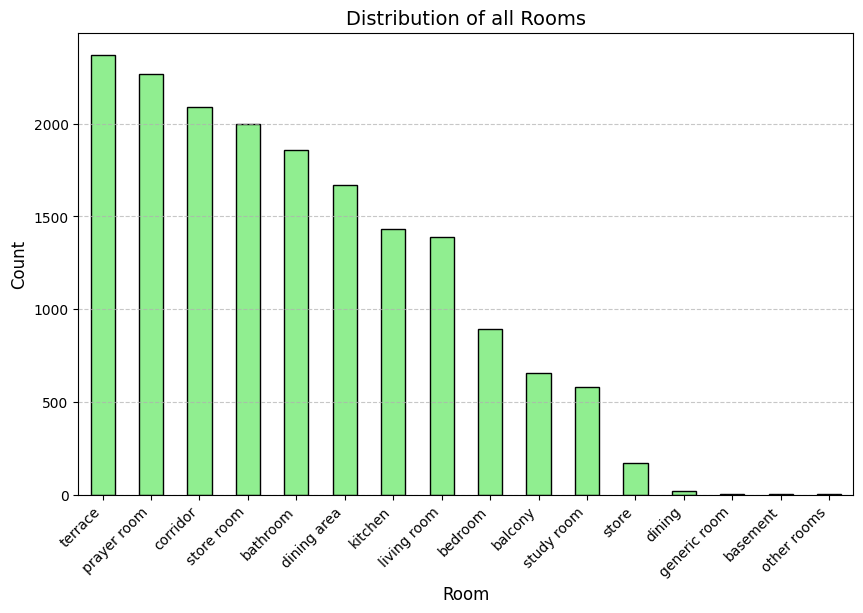

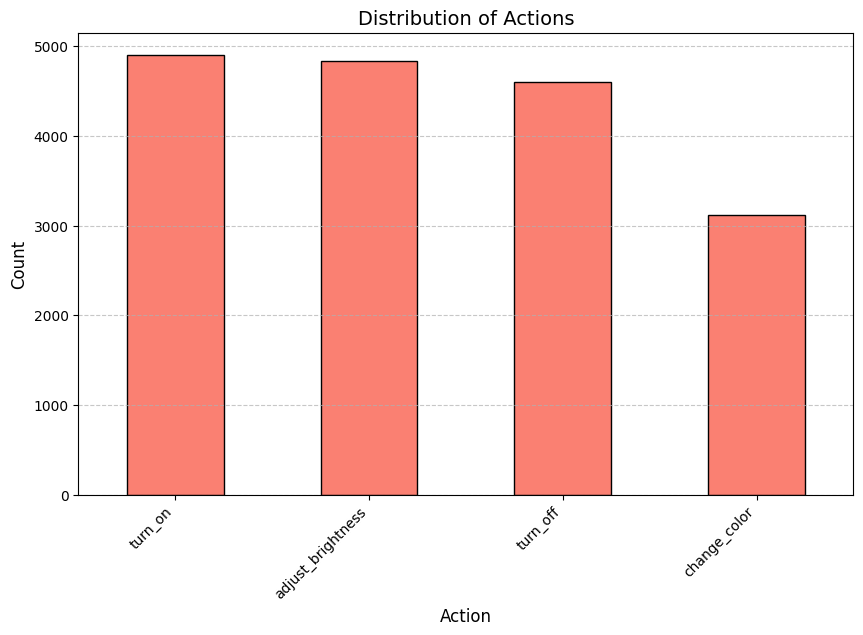

Dataset Overview:
Total Commands: 12194
Unique Intents: 2
Intent Distribution: {'single_room_control': 6991, 'multi_room_control': 5203}


In [6]:
overview = perform_eda(df)

# Print dataset overview
print("Dataset Overview:")
for key, value in overview.items():
    print(f"{key}: {value}")

In [7]:
df1 = df.copy()
df1.head()

,command,intent,rooms,actions
0,Bathroom ma batti on gareko cha ra chat ma pani.,multi_room_control,"[bathroom, terrace]","[{'room': 'bathroom', 'action': 'turn_on'}, {'..."
1,Khaana kotha ra bato ma lights off garnu please.,multi_room_control,"[dining area, corridor]","[{'room': 'dining area', 'action': 'turn_off'}..."
2,Can you turn off the lights in the puja kotha ...,multi_room_control,"[prayer room, store room]","[{'room': 'prayer room', 'action': 'turn_off'}..."
3,Mandir ra bathroom ko lights dim garna sakinu ...,multi_room_control,"[prayer room, bathroom]","[{'room': 'prayer room', 'action': 'adjust_bri..."
4,Store room ra kausi ko batti balai dinus.,multi_room_control,"[store room, terrace]","[{'room': 'store room', 'action': 'turn_on'}, ..."


In [8]:
df1_single = df1[df1['intent'] == 'single_room_control']

Text(0.5, 1.0, 'Single Room intents - Room Distribution')

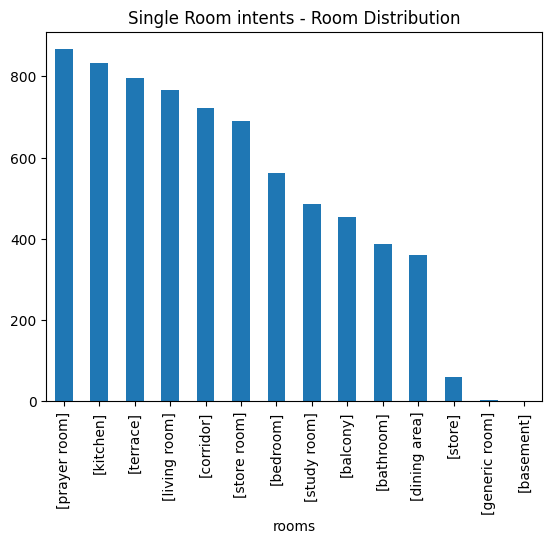

In [9]:
df1_single['rooms'].value_counts().plot(kind='bar')
plt.title("Single Room intents - Room Distribution")

In [10]:
df1_multi = df1[df1['intent'] == 'multi_room_control']
df1_multi

,command,intent,rooms,actions
0,Bathroom ma batti on gareko cha ra chat ma pani.,multi_room_control,"[bathroom, terrace]","[{'room': 'bathroom', 'action': 'turn_on'}, {'..."
1,Khaana kotha ra bato ma lights off garnu please.,multi_room_control,"[dining area, corridor]","[{'room': 'dining area', 'action': 'turn_off'}..."
2,Can you turn off the lights in the puja kotha ...,multi_room_control,"[prayer room, store room]","[{'room': 'prayer room', 'action': 'turn_off'}..."
3,Mandir ra bathroom ko lights dim garna sakinu ...,multi_room_control,"[prayer room, bathroom]","[{'room': 'prayer room', 'action': 'adjust_bri..."
4,Store room ra kausi ko batti balai dinus.,multi_room_control,"[store room, terrace]","[{'room': 'store room', 'action': 'turn_on'}, ..."
...,...,...,...,...
12176,Poojako kotha ra bhaanchaa ko lights on garnus.,multi_room_control,"[prayer room, kitchen]","[{'room': 'prayer room', 'action': 'turn_on'},..."
12182,Turn on the terrace light and off the store ro...,multi_room_control,"[terrace, store room]","[{'room': 'terrace', 'action': 'turn_on'}, {'r..."
12185,Bhanxa ra baithak kotha ko lights off garnus.,multi_room_control,"[kitchen, living room]","[{'room': 'kitchen', 'action': 'turn_off'}, {'..."
12189,Bhanxa ko batti off garera baithak kotha ko ba...,multi_room_control,"[kitchen, living room]","[{'room': 'kitchen', 'action': 'turn_off'}, {'..."


In [11]:
#checking for occurences of living room and kitchen together
df_living_kitchen = df1_multi[df1_multi['rooms'].apply(lambda x: x == ['living room', 'kitchen'] or x == ['kitchen', 'living room'])]

In [12]:
rooms_flat_1 = [room for rooms in df1_multi['rooms'] for room in rooms]
actions_flat_1 = [action['action'] for actions in df1_multi['actions'] for action in actions]

# Create Series for room and action frequencies
rooms_series_1 = pd.Series(rooms_flat_1)
actions_series_1 = pd.Series(actions_flat_1)

Text(0.5, 1.0, 'Multi room intents - Room Distribution')

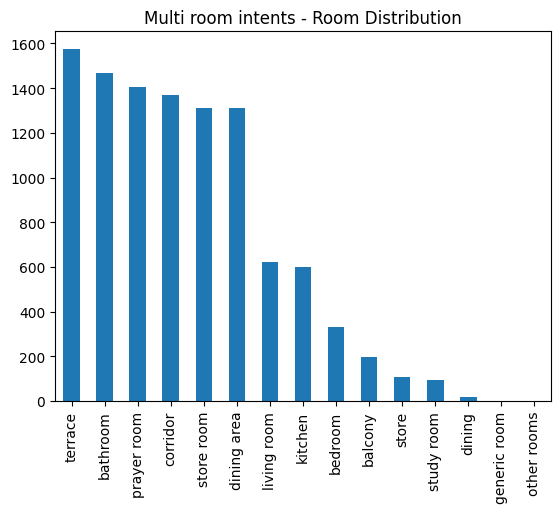

In [13]:
rooms_series_1.value_counts().plot(kind='bar')
plt.title("Multi room intents - Room Distribution")